## <b>Chapter 3. 키워드 분석(Keyword Analysis)</b>

- 키워드란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구이다.
- 키워드 분석이란 불용어 제거와 어간추출 및 형태소 분석 등을 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출하는 것이다.   
- 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초한다.  
- 물론, 빈도 분석에서 영어의 전치사나 한국어의 조사와 같이 의미를 별로 담고 있지 않은 불용어는 제외하는 것이 좋다.
- 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있다.

### 1. 환경설정 및 데이터 다운

##### ① 한글 폰트 설정

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

In [2]:
plt.style.use('seaborn-white')

%config InlineBackend.figure_format = 'retina'

In [ ]:
# 폰트 위치 확인 : 경로를 확인해 보고 아래 설정 
fm.findSystemFonts(fontpaths=None, fontext='ttf')

In [3]:
font_path = 'C:/Users/poscouser/AppData/Local/Microsoft/Windows/Fonts/NanumSquare.ttf'

font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name)

##### ② 네이버 영화 리뷰 데이터 다운
- 네이버 영화 리뷰 데이터 https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [4]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()

In [5]:
print(raw[:3])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

### 2. 형태소 분석

- 데이터를 확인해보면 모두 바이트로 이루어져 있으며, 리뷰 외의 다른 데이터도 존재한다.
- 데이터를 문자열로 변환하고 리뷰만 추출한다.

##### ① 바이트를 문자열로 변환

In [6]:
raw = [x.decode() for x in raw[1:]]

##### ② 리뷰 데이터만 추출

In [7]:
reviews = []

for i in raw:
      reviews.append(i.split('\t')[1])
print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


##### ③ 형태소 분석기로 명사만 추출

In [8]:
from konlpy.tag import Okt

In [9]:
okt = Okt()

nouns = []
for review in reviews:
      for noun in okt.nouns(review):
            nouns.append(noun)
print(nouns[:10])

['때', '디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업']


### 3. 불용어(Stopwords) 제거

##### ① 불용어 사전 만들기

* 형태소 분석을 통해 조사, 접속사 등의 제거 가능하다.
* 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함한다.
* 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요하다.
* 불용어 예: `전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것`
* 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요하다.(예: `영화`)

In [10]:
stop_words = '영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것'
stop_words = stop_words.split(' ')
print(stop_words)

['영화', '전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것']


##### ② 불용어를 제외하여 형태소 분석 수행

* 한글 텍스트에 대해서 형태소 분석 수행한다.
* 분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장한다.

In [11]:
nouns = []

for review in reviews:
      for noun in mecab.nouns(review):
            if noun not in stop_words:
                  nouns.append(noun)
print(nouns[:10])

['디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업', '우리']


### 4. 빈도 분석

#### 1) 단어 빈도수 측정

* 단어 빈도수 측정에는 `collections` 패키지의 `Counter` 함수를 이용한다.
* `collections` 패키지는 내장 패키지로 별도 설치가 필요 없다.
* `counter`를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능하다.

In [12]:
from collections import Counter

In [13]:
c = Counter(nouns)
top_c = dict(c.most_common(10))
print(top_c)

{'연기': 9169, '최고': 8782, '평점': 8511, '생각': 7642, '스토리': 7166, '드라마': 6891, '사람': 6745, '감동': 6490, '배우': 5883, '내용': 5731}


#### 2) 단어 빈도 시각화(그래프)

##### ① 세로 막대 그래프

In [14]:
import numpy as np

x = np.arange(len(top_c))

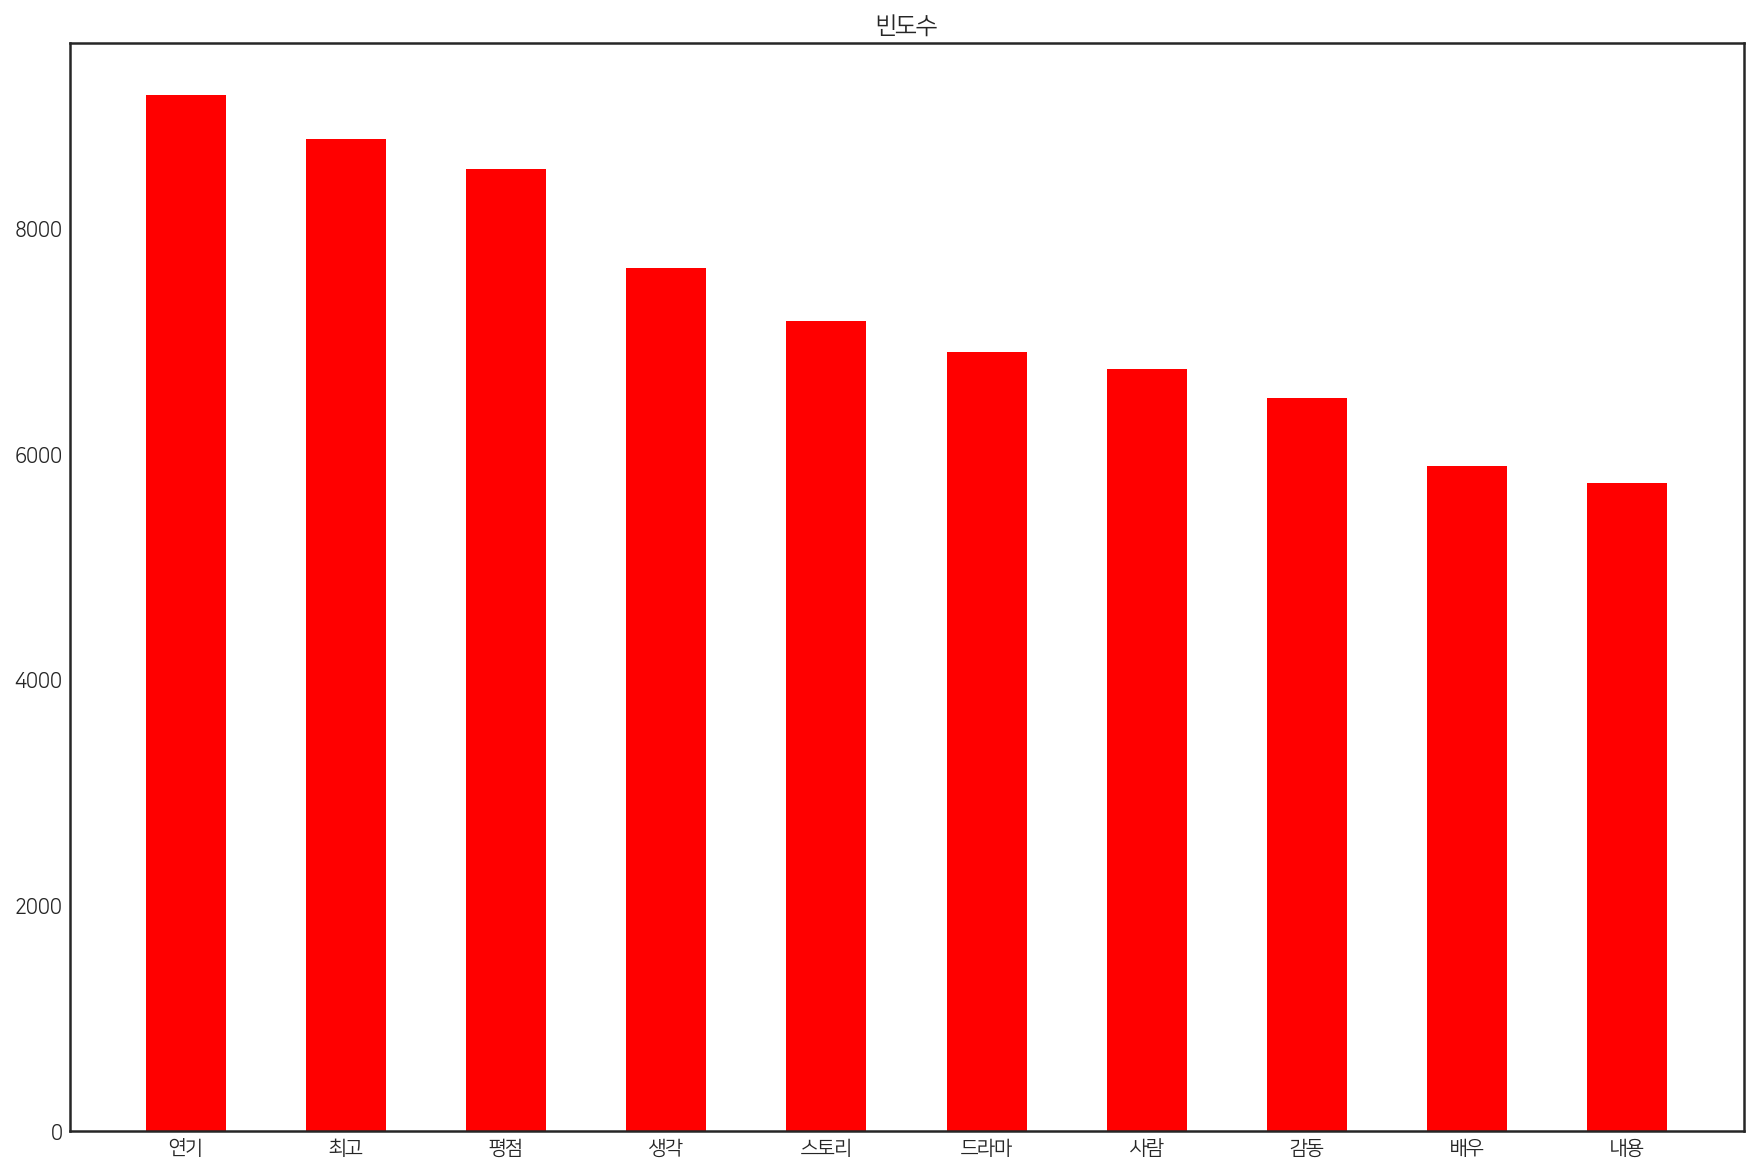

In [15]:
plt.figure(figsize=(15,10))
plt.bar(x, top_c.values(), color = "red", width = 0.5)
plt.title('빈도수')
plt.xticks(x,top_c.keys())
plt.show()

##### ② 가로 막대 그래프

In [16]:
c = Counter(nouns)
top_c = dict(c.most_common(50))

y = np.arange(len(top_c))

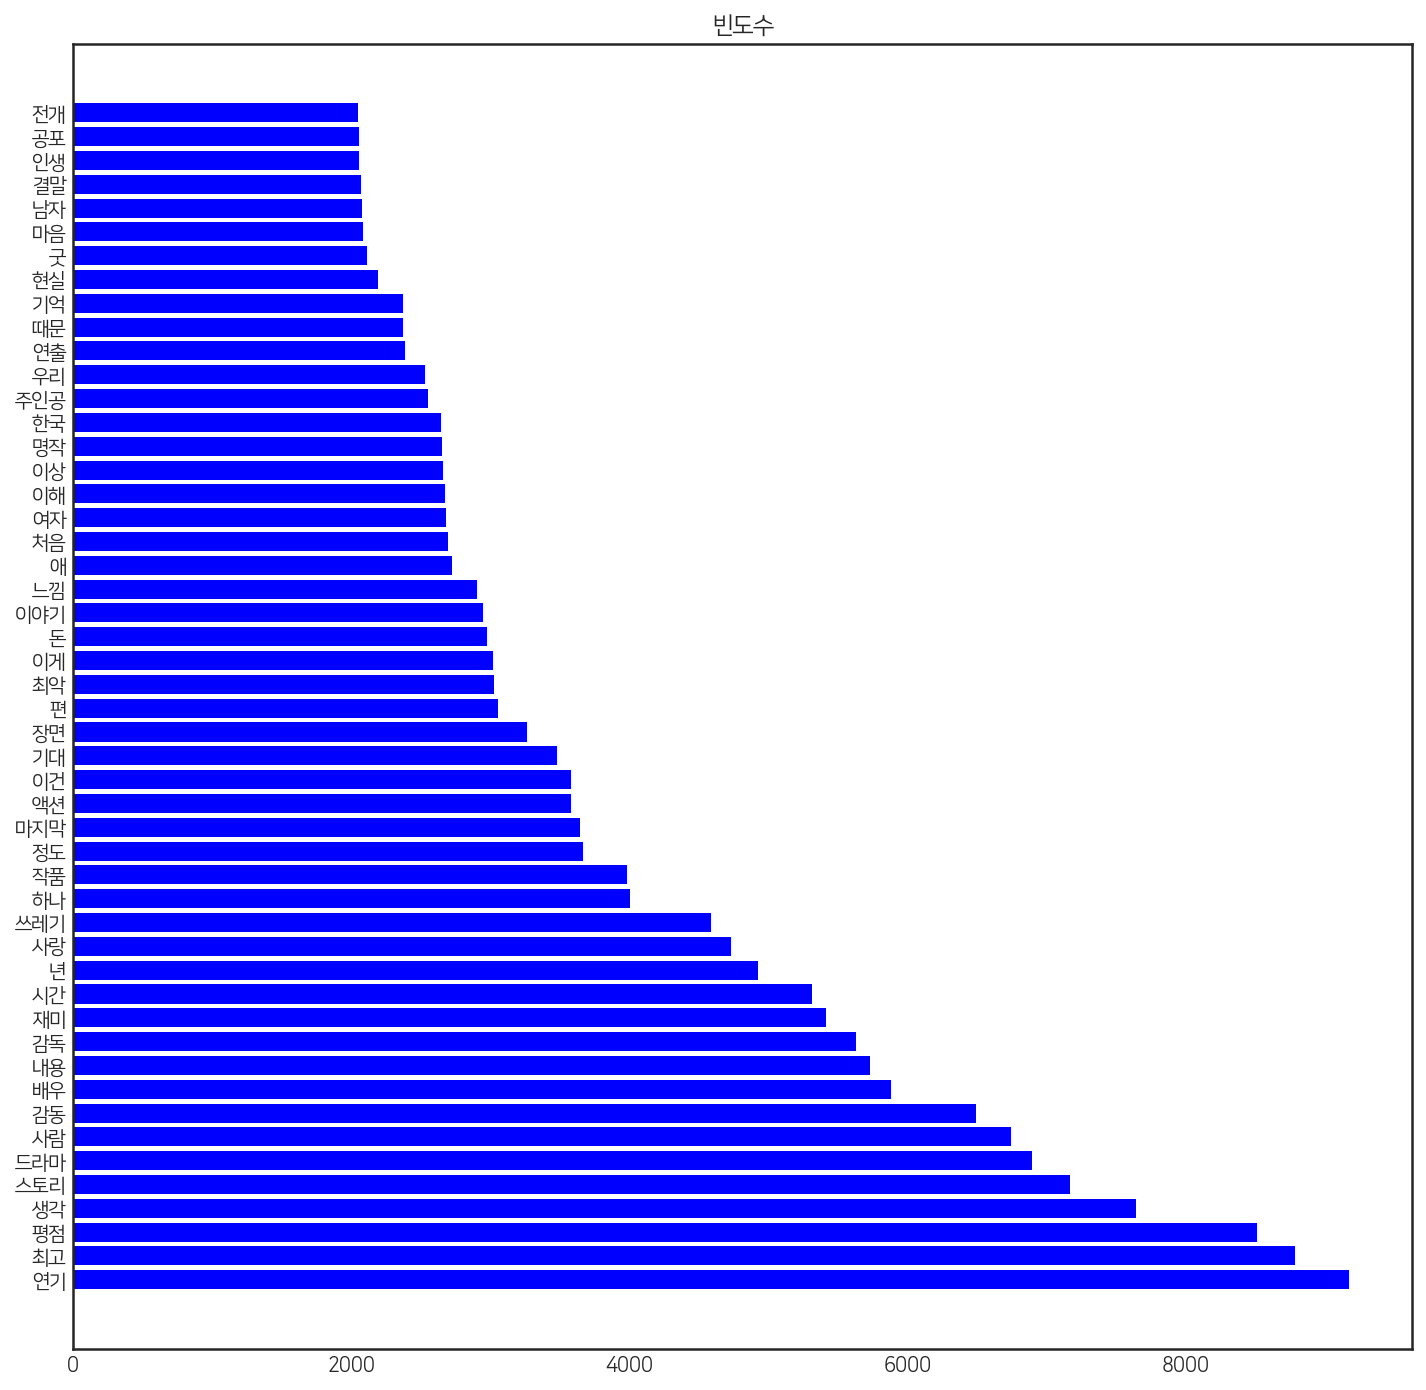

In [17]:
plt.figure(figsize=(12,12))
plt.barh(y, top_c.values(), color = "blue")
plt.title('빈도수')
plt.yticks(y,top_c.keys())
plt.show()

#### 3) 워드클라우드(WordCloud)

* 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화하는 방법이다.
* 텍스트에 등장하는 단어를 그 등장 빈도에 따라 서로 크기가 다르게 구름 형태로 표현함으로써, 단어의 빈도 수를 한번에 알 수 있다.
* 최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는가를 워드클라우드 형식으로 시각화한다.
* 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데는 한계가 있다.

##### ① 파이썬에서 워드 클라우드를 시각화하기 위해 `matplotlib`와 `WordCloud`를 사용한다.

In [18]:
from wordcloud import WordCloud

In [19]:
wc = WordCloud(font_path = 'gulim',  width=800, height=400, scale=2.0, max_font_size=250, max_words=200,
background_color='white')

gen = wc.generate_from_frequencies(c)

##### ② WordCloud를 이용해 객체를 생성해주고, `generate_from_frequencies()` 함수로 빈도 수에 따라 워드클라우드 생성한다.

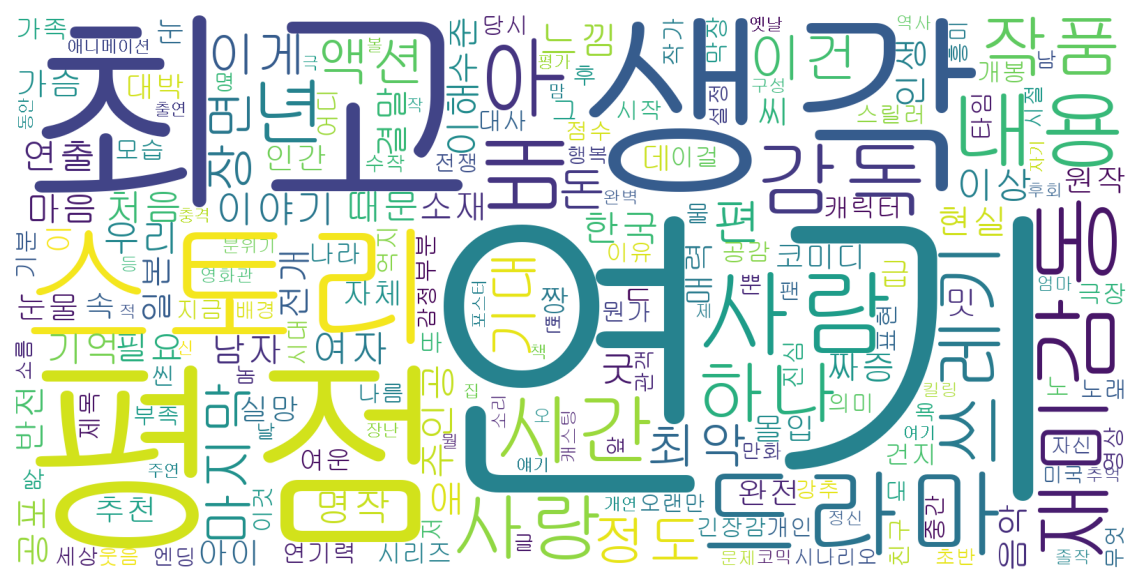

In [20]:
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(gen) 

##### ③ 배경 이미지에 워드클라우드 생성 - 배경 이미지를 배열로 변경하여 그 안에 들어가게 만드는 것

In [21]:
from PIL import Image
img = Image.open('./data_set/image.png')
img_array = np.array(img)

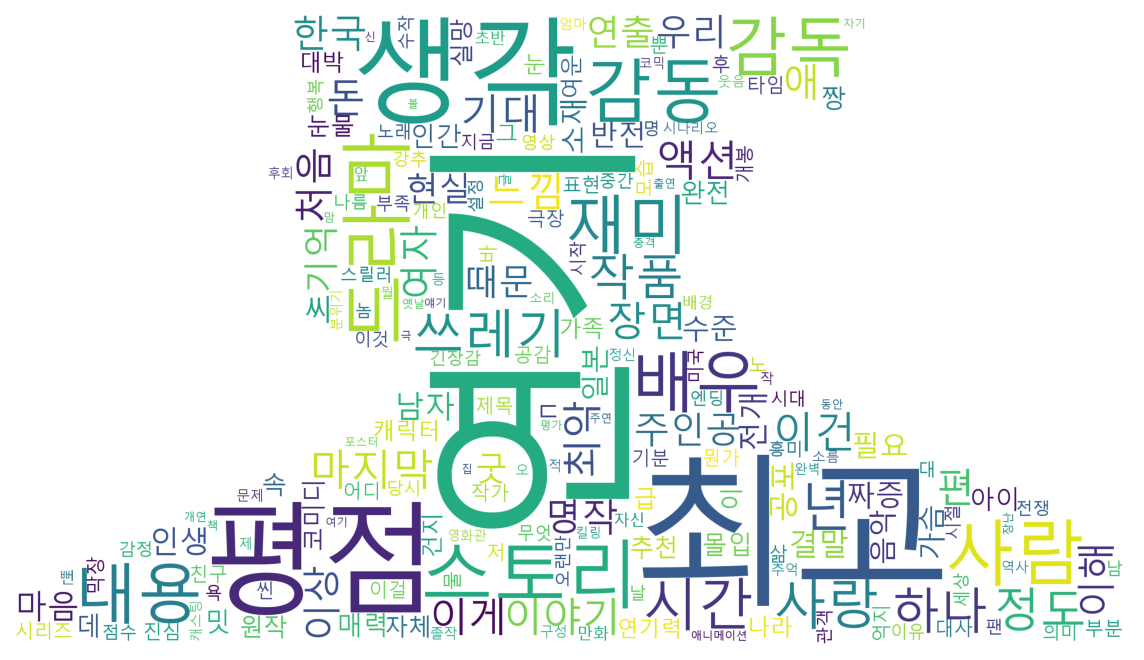

In [22]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array, background_color='white')
gen = wc.generate_from_frequencies(c)
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(gen)

#### 4) squarify 트리맵 시각화

* `squarify`는 트리맵 생성을 지원해주는 파이썬 라이브러리이다.
* `squarify`를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타낸다.   

In [23]:
import squarify

<AxesSubplot:>

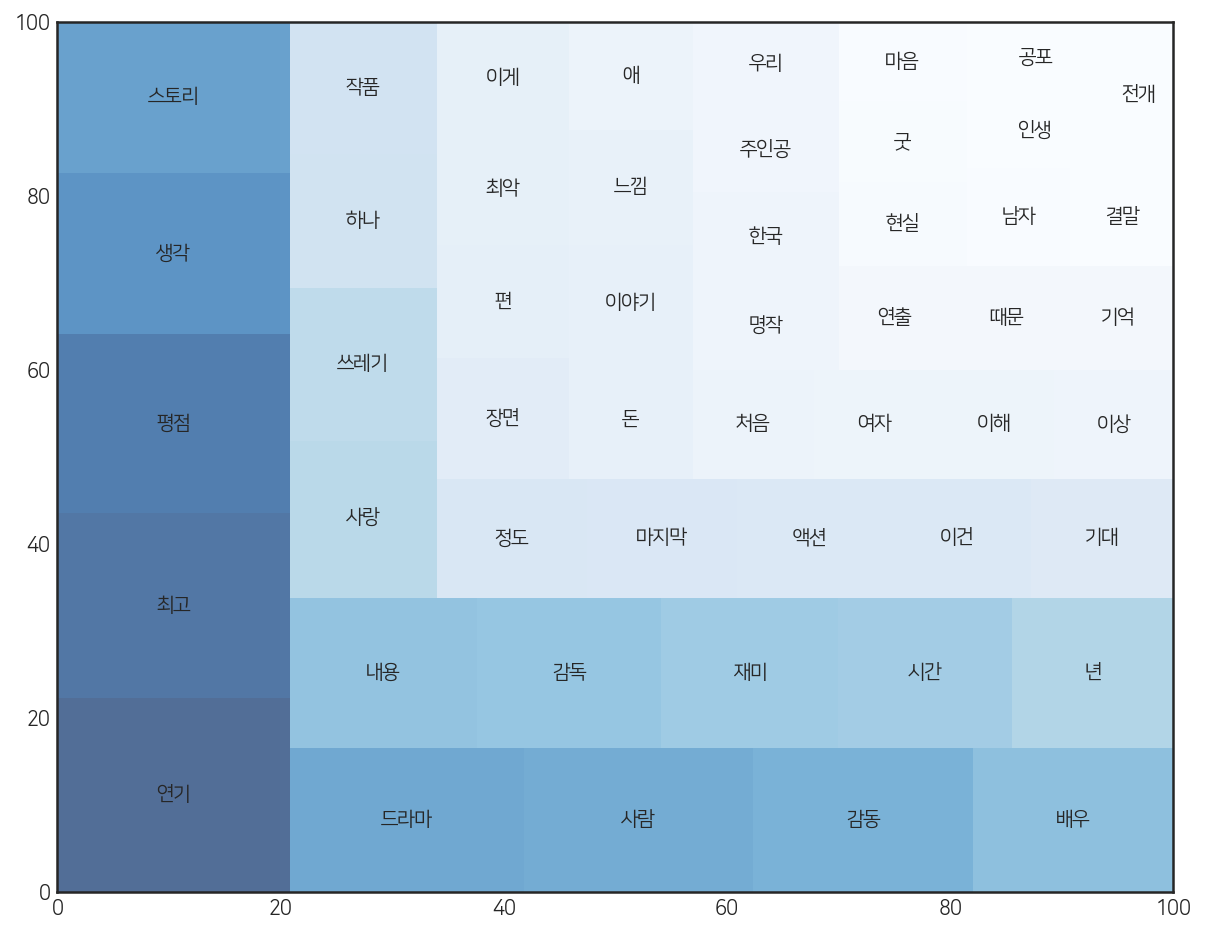

In [24]:
norm = mpl.colors.Normalize(vmin=min(top_c.values()),vmax=max(top_c.values()))
colors = [mpl.cm.Blues(norm(value)) for value in top_c.values()]
fig, ax = plt.subplots(1, figsize = (10,8))

squarify.plot(label=top_c.keys(), sizes=top_c.values(), color=colors, alpha=0.7)